<a href="https://colab.research.google.com/github/Joyel1441/DeepLearningNotes/blob/main/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chapter 6 (Gradient Descent)

In [ ]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

from IPython import display
display.set_matplotlib_formats('svg')

Gradient descent in 1D

In [ ]:
def fx(x):
  return 3*x**2 - 3*x + 4

def deriv(x):
  return 6*x - 3

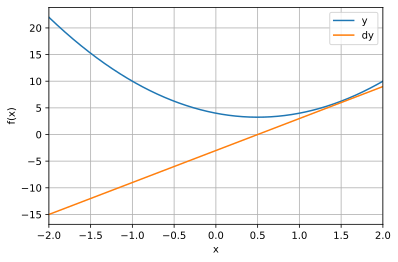

In [ ]:
x = np.linspace(-2, 2, 2001)

plt.plot(x, fx(x), x, deriv(x))
plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y', 'dy'])
plt.show()

In [ ]:
localmin = np.random.choice(x, 1)
print(localmin)

learning_rate = 0.01
training_epochs = 100

for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad

localmin

[-0.212]


array([0.49853693])

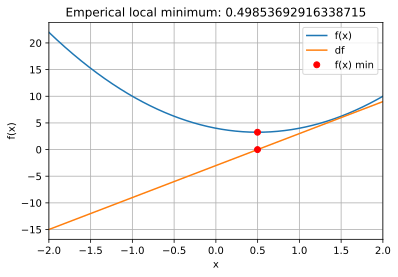

In [ ]:
plt.plot(x, fx(x), x, deriv(x))
plt.plot(localmin, deriv(localmin), 'ro')
plt.plot(localmin, fx(localmin), 'ro')

plt.xlim(x[[0, -1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)', 'df', 'f(x) min'])
plt.title(f'Emperical local minimum: {localmin[0]}')
plt.show()

In [ ]:
localmin = np.random.choice(x, 1)

learning_rate = 0.01
training_epochs = 1000

modelparams = np.zeros((training_epochs, 2))
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad
  modelparams[i, :] = localmin, grad

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  # Remove the CWD from sys.path while we load stuff.


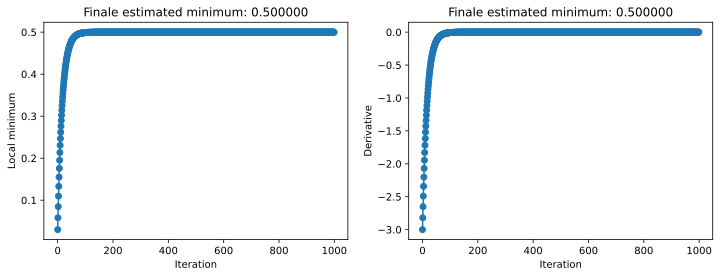

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

for i in range(2):
  ax[i].plot(modelparams[:,i], 'o-')
  ax[i].set_xlabel('Iteration')
  ax[i].set_title(f'Finale estimated minimum: {localmin[0]:5f}')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')

plt.show()



---



Gradient descent in 2D

In [ ]:
def peaks(x, y):
  x, y = np.meshgrid(x, y)

  z = 3*(1-x)**2 * np.exp(-(x**2) - (y+1)**2) - 10*(x/5 - x**3 - y**5) * np.exp(-x**2-y**2) -1/3*np.exp(-(x+1)**2  - y**2)

  return z

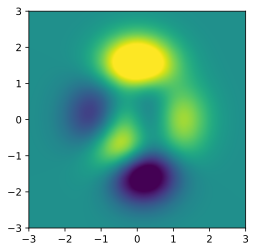

In [ ]:
x = np.linspace(-3, 3, 201)
y = np.linspace(-3, 3, 201)

Z = peaks(x, y)

plt.imshow(Z, extent=[x[0], x[-1], y[0], y[-1]], vmin=-5, vmax=5, origin='lower')
plt.show()

In [ ]:
sx, sy = sym.symbols('sx,sy')

sZ = 3*(1-sx)**2 * sym.exp(-(sx**2) - (sy+1)**2) - 10*(sx/5 - sx**3 - sy**5) * sym.exp(-sx**2-sy**2) - 1/3*sym.exp(-(sx+1)**2 - sy**2)

df_x = sym.lambdify((sx,sy), sym.diff(sZ,sx), 'sympy')
df_y = sym.lambdify((sx,sy), sym.diff(sZ,sy), 'sympy')

df_x(1,1).evalf()

-1.07369833656079

In [ ]:
localmin = np.random.rand(2)*4-2
startpnt = localmin[:]

learning_rate = 0.01
training_epochs = 1000

trajectory = np.zeros((training_epochs, 2))
for i in range(training_epochs):
  grad = np.array([df_x(localmin[0], localmin[1]).evalf(), df_y(localmin[0], localmin[1]).evalf()])
  localmin = localmin - learning_rate*grad
  trajectory[i,:] = localmin

print(localmin)
print(startpnt)

[0.228278920556369 -1.62553495750000]
[-0.04124339 -0.90683592]


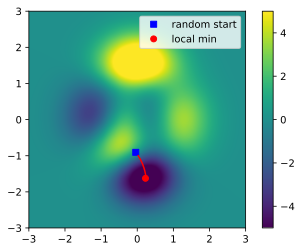

In [ ]:
plt.imshow(Z, extent=[x[0],x[-1],y[0],y[-1]], vmin=-5, vmax=5, origin='lower')
plt.plot(startpnt[0], startpnt[1], 'bs')
plt.plot(localmin[0], localmin[1], 'ro')
plt.plot(trajectory[:,0], trajectory[:,1], 'r')
plt.legend(['random start', 'local min'])
plt.colorbar()
plt.show()



---



Running experiments to understand gradient descent

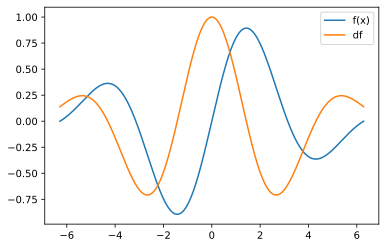

In [ ]:
x = np.linspace(-2*np.pi, 2*np.pi, 401)
fx = np.sin(x) * np.exp(-x**2*0.05)

df = np.cos(x)*np.exp(-x**2*0.05) + np.sin(x)*(-0.1*x)*np.exp(-x**2*0.05) 

plt.plot(x, fx, x, df)
plt.legend(['f(x)', 'df'])

In [ ]:
def fx(x):
  return np.sin(x) * np.exp(-x**2*0.05)

def deriv(x):
  return np.cos(x)*np.exp(-x**2*0.05) - np.sin(x)*0.01*x*np.exp(-x**2*0.05)

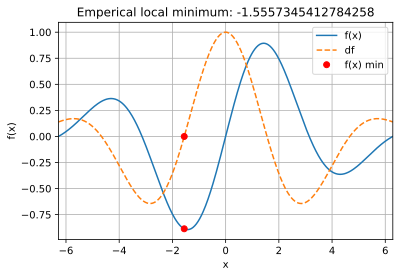

In [ ]:
localmin = np.random.choice(x, 1)

learning_rate = 0.01
training_epochs = 1000

for i in range(training_epochs):
  grad = deriv(localmin) 
  localmin = localmin - learning_rate*grad

plt.plot(x, fx(x), x, deriv(x), '--')
plt.plot(localmin, deriv(localmin), 'ro')
plt.plot(localmin, fx(localmin), 'ro')

plt.xlim(x[[0, -1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)', 'df', 'f(x) min'])
plt.title(f'Emperical local minimum: {localmin[0]}')
plt.show()

Run parametric experiments

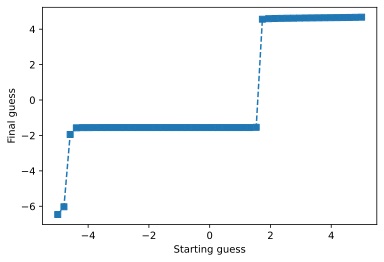

In [ ]:
#Experiment 1: systematically varying the starting locations

startlocs = np.linspace(-5, 5, 50)
finalres = np.zeros(len(startlocs))

#loop over starting points 
for idx, localmin in enumerate(startlocs):
  #run through training
  for i in range(training_epochs):
    grad = deriv(localmin)
    localmin = localmin - learning_rate*grad
  
  #store the final guess
  finalres[idx] = localmin

#plot the results
plt.plot(startlocs, finalres, 's--')
plt.xlabel('Starting guess')
plt.ylabel('Final guess')
plt.show()

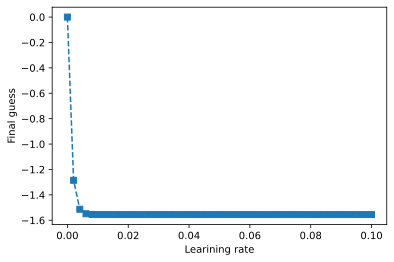

In [ ]:
#Experiment 2: systematically varying the learning rate

learningrates = np.linspace(1e-10, 1e-1, 50)
finalres = np.zeros(len(learningrates))

#loop over learning rates
for idx, learningRate in enumerate(learningrates):
  #force starting guess to 0
  localmin = 0

  #run through training
  for i in range(training_epochs):
    grad = deriv(localmin)
    localmin = localmin - learningRate*grad

  #store the final guess
  finalres[idx] = localmin

plt.plot(learningrates, finalres, 's--')
plt.xlabel('Learining rate')
plt.ylabel('Final guess')
plt.show()

In [ ]:
#Experiment 3: interaction between learning rate and training epochs

#setup parameters
learningrates = np.linspace(1e-10, 1e-1, 50)
training_epochs = np.round(np.linspace(10, 500, 40))

#initialize matrix to store results
finalres = np.zeros((len(learningrates), len(training_epochs)))

#loop over learning rates
for Lidx, learningRate in enumerate(learningrates):
  #loop over training epochs
  for Eidx, trainEpochs in enumerate(training_epochs):
    #run through training (again fixing starting locations)
    localmin = 0
    for i in range(int(trainEpochs)):
      grad = deriv(localmin)
      localmin = localmin - learningRate*grad

    #store the final guess
    finalres[Lidx, Eidx] = localmin

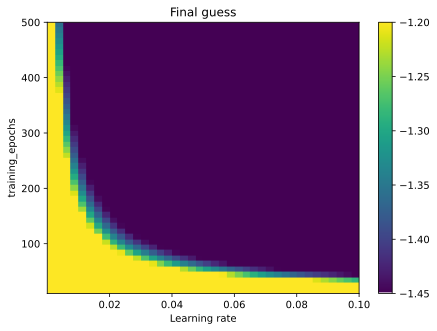

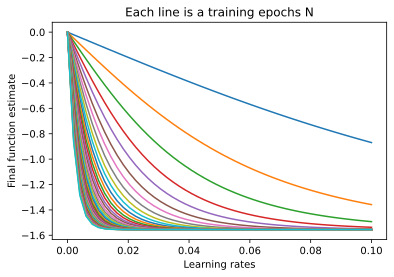

In [ ]:
#plot the results

fig, ax = plt.subplots(figsize=(7, 5))
plt.imshow(finalres, extent=[learningrates[0], learningrates[-1], training_epochs[0], training_epochs[-1]], aspect='auto', origin='bottom', vmin=-1.45, vmax=-1.2)
plt.xlabel('Learning rate')
plt.ylabel('training_epochs')
plt.title('Final guess')
plt.colorbar()
plt.show()

#another visualization
plt.plot(learningrates, finalres)
plt.xlabel('Learning rates')
plt.ylabel('Final function estimate')
plt.title('Each line is a training epochs N')
plt.show()

Create function and its derivative

In [ ]:
#define a range for x
x = np.linspace(-2, 2, 2001)

#function (as a function)
def fx(x):
  return 3*x**2 - 3*x + 4

#derivative function
def deriv(x):
  return 6*x - 3

Gradient descent using a fixed learning rate

In [ ]:
#random starting point
localmin = np.random.choice(x, 1)
#store the initial value
initval = localmin[:]

#learning parameters
learning_rate = 0.01
training_epochs = 50

#run through training and store all the results
modelparamsFixed = np.zeros((training_epochs, 3))
for i in range(training_epochs):
  #compute gradient
  grad = deriv(localmin)

  #non-adaptive learning rate
  lr = learning_rate

  #update parameter according to gradient descent
  localmin = localmin - lr*grad

  #store the parameters
  modelparamsFixed[i, :] = localmin, grad, lr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.


Gradient descent using a gradient-based learning rate

In [ ]:
#random startin point
localmin = np.random.choice(x, 1)
#store the initial value
initval = localmin[:]

#learning parameters
learning_rate = 0.01
training_epochs = 50

#run through training and store all the results
modelparamsGrad = np.zeros((training_epochs, 3))
for i in range(training_epochs):
  #compute gradient
  grad = deriv(localmin)
  #adapt the learning rate according to the gradient
  lr = learning_rate*np.abs(grad)
  #update parmeter according to gradient descent
  localmin = localmin - lr*grad
  #store the parameters
  modelparamsGrad[i, :] = localmin, grad, lr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.


Gradient descent using a time-based learning rate

In [ ]:
#redefine parameters
learning_rate = 0.1
localmin = initval

#run through training and store all the results
modelparamsTime = np.zeros((training_epochs, 3))
for i in range(training_epochs):
  grad = deriv(localmin)
  lr = learning_rate*(1-(i+1)/training_epochs)
  localmin = localmin - lr*grad
  modelparamsTime[i, :] = localmin, grad, lr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  # This is added back by InteractiveShellApp.init_path()


Plot the results

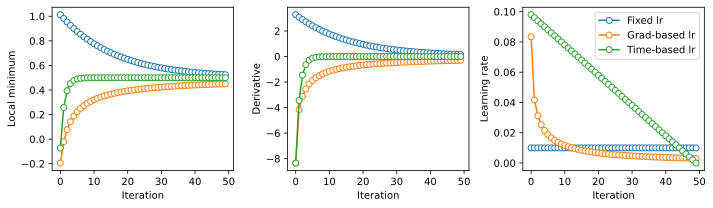

In [ ]:
fix, ax = plt.subplots(1, 3, figsize=(10, 3))

#generate the plots
for i in range(3):
  ax[i].plot(modelparamsFixed[:, i], 'o-', markerfacecolor='w')
  ax[i].plot(modelparamsGrad[:, i], 'o-', markerfacecolor='w')
  ax[i].plot(modelparamsTime[:, i], 'o-', markerfacecolor='w')
  ax[i].set_xlabel('Iteration')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')
ax[2].set_ylabel('Learning rate')
ax[2].legend(['Fixed lr', 'Grad-based lr', 'Time-based lr'])

plt.tight_layout()
plt.show()



---



Chapter 7 (ANN)

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

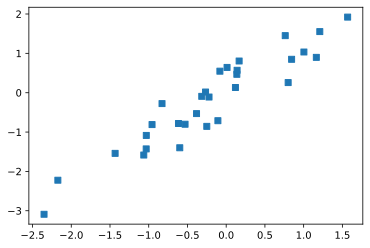

In [ ]:
#create data
N = 30
x = torch.randn(N, 1)
y = x + torch.randn(N, 1)/2

#plot data
plt.plot(x, y, 's')
plt.show()

In [ ]:
#build model
ANNreg = nn.Sequential(
    nn.Linear(1, 1), #input layer
    nn.ReLU(),       #activation function
    nn.Linear(1, 1)  #output layer
)

ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
#learning rate
learningRate = 0.05

#loss function
lossfun = nn.MSELoss()

#optimizer (the flavor of gradient descent to implement)
optimizer = torch.optim.SGD(ANNreg.parameters(), lr=learningRate)

In [ ]:
#train the model
numepochs = 500
losses = torch.zeros(numepochs)

#train the model
for epochi in range(numepochs):
  #forward pass
  yHat = ANNreg(x)
  
  #compute loss
  loss = lossfun(yHat, y)
  losses[epochi] = loss

  #backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

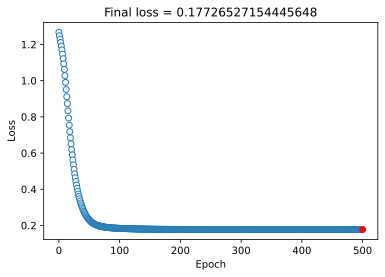

In [ ]:
#show the losses
#manually compute losses

#final forward pass
predictions = ANNreg(x)

#final loss (MSE)
testloss = (predictions-y).pow(2).mean()

plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=0.1)
plt.plot(numepochs, testloss.detach(), 'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title(f'Final loss = {testloss.item()}')
plt.show()

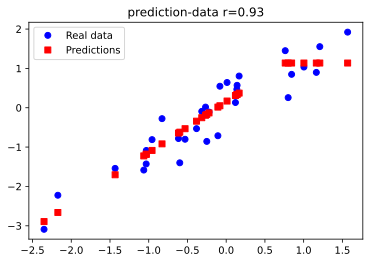

In [ ]:
#plot the data
plt.plot(x, y, 'bo', label='Real data')
plt.plot(x, predictions.detach(), 'rs', label='Predictions')
plt.title(f'prediction-data r={np.corrcoef(y.T, predictions.detach().T)[0,1]:.2f}')
plt.legend()
plt.show()



---



In [ ]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

A function that creates and trains the model

In [ ]:
def buildAndTrainTheModel(x, y):
  #build the model
  ANNreg = nn.Sequential(
      nn.Linear(1, 1), #input layer
      nn.ReLU(),       #activation function
      nn.Linear(1, 1), #output layer  
  )

  #loss and optimizer functions
  lossfun = nn.MSELoss()
  optimizer = torch.optim.SGD(ANNreg.parameters(), lr=0.05)

  #train the model
  numepochs = 500
  losses = torch.zeros(numepochs)

  for epochi in range(numepochs):
    #forward pass
    yHat = ANNreg(x)

    #compute loss
    loss = lossfun(yHat, y)
    losses[epochi] = loss

    #backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  
  #compute model predictions
  predictions = ANNreg(x)

  return predictions, losses

A function that creates the data

In [ ]:
def createTheData(m):
  N = 50
  x = torch.randn(N, 1)
  y = m*x + torch.randn(N, 1)/2

  return x, y

Test it once

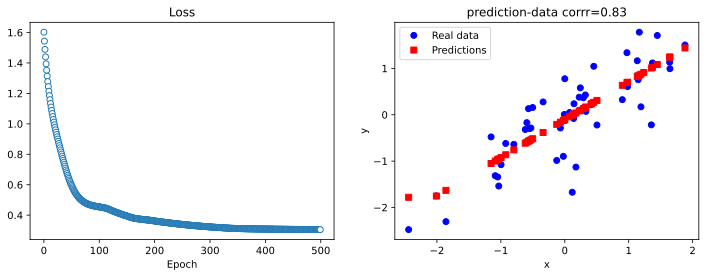

In [ ]:
#create the dataset
x, y = createTheData(0.8)

#run the model
yHat, losses = buildAndTrainTheModel(x, y)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(losses.detach(), 'o', markerfacecolor='w', linewidth=0.1)
ax[0].set_xlabel('Epoch')
ax[0].set_title('Loss')

ax[1].plot(x, y, 'bo', label='Real data')
ax[1].plot(x, yHat.detach(), 'rs', label='Predictions')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title(f'prediction-data corr={np.corrcoef(y.T, yHat.T.detach())[0,1]:.2f}')
ax[1].legend()

plt.show()

In [ ]:
#the slopes to simulate
slopes = np.linspace(-2, 2, 21)

numExps = 50

#intialize output matrix
results = np.zeros((len(slopes), numExps, 2))

for slopei in range(len(slopes)):
  for N in range(numExps):
    #create a dataset and run the model
    x, y = createTheData(slopes[slopei])
    yHat, losses = buildAndTrainTheModel(x, y)

    #store the final loss and performance
    results[slopei, N, 0] = losses[-1]
    results[slopei, N, 1] = np.corrcoef(y.T, yHat.T.detach())[0,1]

#correlation can be 0 if the model didn't do well. Set nan's->0
results[np.isnan(results)] = 0

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


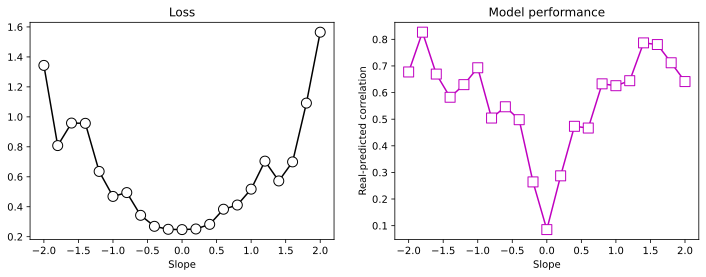

In [ ]:
#plot the results
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(slopes, np.mean(results[:,:,0], axis=1), 'ko-', markerfacecolor='w', markersize=10)
ax[0].set_xlabel('Slope')
ax[0].set_title('Loss')

ax[1].plot(slopes, np.mean(results[:,:,1], axis=1), 'ms-', markerfacecolor='w', markersize=10)
ax[1].set_xlabel('Slope')
ax[1].set_ylabel('Real-predicted correlation')
ax[1].set_title('Model performance')

plt.show()



---



In [ ]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

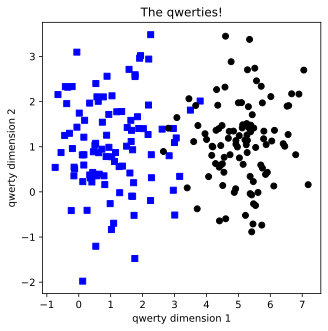

In [ ]:
#create data

nPerClust = 100
blur = 1

A = [1, 1]
B = [5, 1]

#generate data
a = [A[0]+np.random.randn(nPerClust)*blur, A[1]+np.random.randn(nPerClust)*blur]
b = [B[0]+np.random.randn(nPerClust)*blur, B[1]+np.random.randn(nPerClust)*blur]

#true labels
labels_np = np.vstack((np.zeros((nPerClust, 1)), np.ones((nPerClust, 1))))

#concatenate into a matrix
data_np = np.hstack((a, b)).T

#convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

#show the data
fig = plt.figure(figsize=(5, 5))
plt.plot(data[np.where(labels==0)[0], 0], data[np.where(labels==0)[0], 1], 'bs')
plt.plot(data[np.where(labels==1)[0], 0], data[np.where(labels==1)[0], 1], 'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [ ]:
#build the model
ANNclassify = nn.Sequential(
    nn.Linear(2, 1),  #input layer
    nn.ReLU(),        #activation unit
    nn.Linear(1, 1),  #output unit
    nn.Sigmoid()      #final activation unit
)

ANNclassify

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

In [ ]:
#other model features
learningRate = 0.01

#loss function
lossfun = nn.BCELoss()

#optimizer
optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=learningRate)

In [ ]:
#train the model
numepochs = 1000
losses = torch.zeros(numepochs)

for epochi in range(numepochs):
  #forward pass
  yHat = ANNclassify(data)
  
  #compute loss
  loss = lossfun(yHat, labels)
  losses[epochi] = loss

  #backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

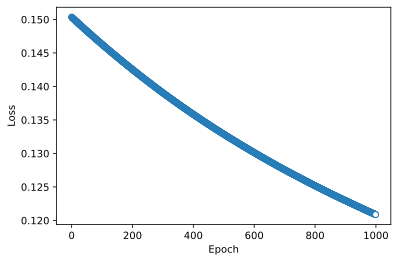

In [ ]:
#show the losses
plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=0.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
#compute the predictions
#manually compute losses
#final forward pass
predictions = ANNclassify(data)

predlabels = predictions > 0.5

#find errors
misclassified = np.where(predlabels != labels)[0]

#total accuracy
totalacc = 100-100*len(misclassified)/(2*nPerClust)

print(f'Final accuracy: {totalacc}')

Final accuracy: 95.0


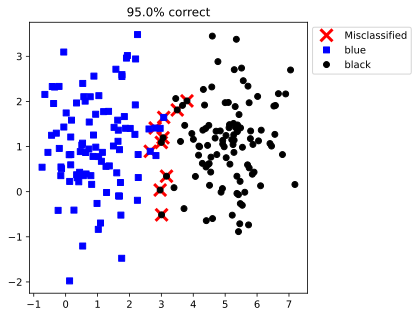

In [ ]:
# plot the labeled data
fig = plt.figure(figsize=(5,5))
plt.plot(data[misclassified,0] ,data[misclassified,1],'rx',markersize=12,markeredgewidth=3)
plt.plot(data[np.where(~predlabels)[0],0],data[np.where(~predlabels)[0],1],'bs')
plt.plot(data[np.where(predlabels)[0],0] ,data[np.where(predlabels)[0],1] ,'ko')

plt.legend(['Misclassified','blue','black'],bbox_to_anchor=(1,1))
plt.title(f'{totalacc}% correct')
plt.show()



---



In [ ]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

Create the data

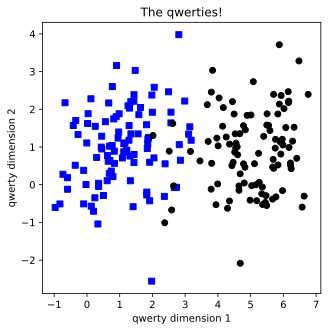

In [ ]:
#parameters
nPerClust = 100
blur = 1

A = [1, 1]
B = [5, 1]

#generate data
a = [A[0]+np.random.randn(nPerClust)*blur, A[1]+np.random.randn(nPerClust)*blur]
b = [B[0]+np.random.randn(nPerClust)*blur, B[1]+np.random.randn(nPerClust)*blur]

#true labels
labels_np = np.vstack((np.zeros((nPerClust, 1)), np.ones((nPerClust, 1))))

#concatenate into a matrix
data_np = np.hstack((a, b)).T

data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

#show the data
fig = plt.figure(figsize=(5, 5))
plt.plot(data[np.where(labels==0)[0], 0], data[np.where(labels==0)[0], 1], 'bs')
plt.plot(data[np.where(labels==1)[0], 0], data[np.where(labels==1)[0], 1], 'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

Functions to build and train the model

In [ ]:
def createANNmodel(learningRate):
  #model architecture
  ANNclassify = nn.Sequential(
      nn.Linear(2, 1),  #inout layer
      nn.ReLU(),        #activation unit
      nn.Linear(1, 1),      #output unit
  )

  #loss function
  lossfun = nn.BCEWithLogitsLoss()

  #optimizer
  optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=learningRate)

  return ANNclassify, lossfun, optimizer

In [ ]:
#function that trains the model

#fixed parameter
numepochs = 1000

def trainTheModel(ANNmodel):
  #initialize losses
  losses = torch.zeros(numepochs)

  #loop over epochs
  for epochi in range(numepochs):
    #forward pass
    yHat = ANNmodel(data)

    #compute loss
    loss = lossfun(yHat, labels)
    losses[epochi] = loss

    #backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  #final forward pass
  predictions = ANNmodel(data)

  #compute the predictions and report accuracy
  totalacc = 100*torch.mean(((predictions>0) == labels).float())

  return losses, predictions, totalacc

Test the new code by running it once

Final accuracy: 99.0%


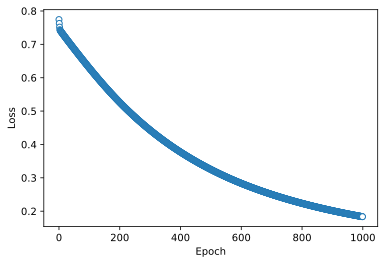

In [ ]:
#create everything
ANNclassify, lossfun, optimizer = createANNmodel(0.01)

#run it
losses, predictions, totalacc = trainTheModel(ANNclassify)

#report accuracy
print(f'Final accuracy: {totalacc}%')

#show the losses
plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=0.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Now for the experiment

In [ ]:
#the set of learning rates to test
learningrates = np.linspace(0.001, 0.1, 40)

#initialize results output
accByLR = []
allLosses = np.zeros((len(learningrates), numepochs))

#loop through learning rates
for i, lr in enumerate(learningrates):
  #create and run the model
  ANNclassify, lossfun, optimizer = createANNmodel(lr)
  losses, predictions, totalacc = trainTheModel(ANNclassify)

  #store the results
  accByLR.append(totalacc)
  allLosses[i, :] = losses.detach()

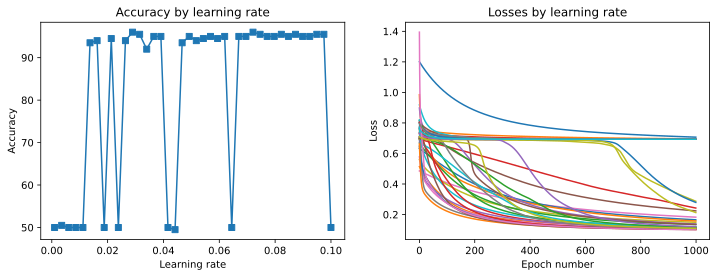

In [ ]:
#plot the results
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(learningrates, accByLR, 's-')
ax[0].set_xlabel('Learning rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by learning rate')

ax[1].plot(allLosses.T)
ax[1].set_title('Losses by learning rate')
ax[1].set_xlabel('Epoch number')
ax[1].set_ylabel('Loss')
plt.show()

In [ ]:
#propotion of runs where the model had at least 70% accuracy
sum(torch.tensor(accByLR)>70)/len(accByLR)

tensor(0.7250)

Run a meta-experiment to get more reliable results

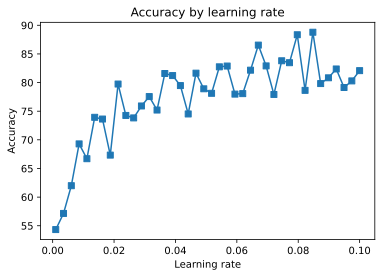

In [ ]:
#run a meta-experiment by repeating the experiment N times
#different random weight intialization each time

#number of times to iterate through the experiment
numExps = 50

#matrix to store all results
accMeta = np.zeros((numExps, len(learningrates)))

#fewer epochs to reduce computation time
numepochs = 500

for expi in range(numExps):
  for i, lr in enumerate(learningrates):
    #create and run the model
    ANNclassify, lossfun, optimizer = createANNmodel(lr)
    losses, predictions, totalacc = trainTheModel(ANNclassify)

    #store the results
    accMeta[expi, i] = totalacc

#plot the results, averaged over experiments
plt.plot(learningrates, np.mean(accMeta, axis=0), 's-')
plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.title('Accuracy by learning rate')
plt.show()



---



In [ ]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

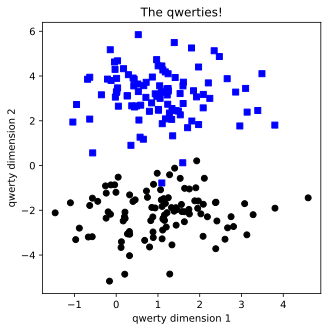

In [ ]:
#parameters
nPerClust = 100
blur = 1

A = [1, 3]
B = [1, -2]

#generate data
a = [A[0]+np.random.randn(nPerClust)*blur, A[1]+np.random.randn(nPerClust)*blur]
b = [B[0]+np.random.randn(nPerClust)*blur, B[1]+np.random.randn(nPerClust)*blur]

#true labels
labels_np = np.vstack((np.zeros((nPerClust, 1)), np.ones((nPerClust, 1))))

#concatenate into a matrix
data_np = np.hstack((a, b)).T

data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

#show the data
fig = plt.figure(figsize=(5, 5))
plt.plot(data[np.where(labels==0)[0], 0], data[np.where(labels==0)[0], 1], 'bs')
plt.plot(data[np.where(labels==1)[0], 0], data[np.where(labels==1)[0], 1], 'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

Functions to build an train the model

In [ ]:
def createANNmodel(learningRate):
  #model architecture
  ANNclassify = nn.Sequential(
      nn.Linear(2, 16),    #input layer
      nn.ReLU(),           #activation unit
      nn.Linear(16, 1),    #hidden layer
      nn.ReLU(),           #activation unit
      nn.Linear(1, 1),     #output unit
      nn.Sigmoid()         #final activation unit
  )

  #loss function
  lossfun = nn.BCELoss()

  #optimizer
  optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=learningRate)

  return ANNclassify, lossfun, optimizer

In [ ]:
#function that trains the model

#fixed parameter
numepochs = 1000

def trainTheModel(ANNmodel):
  #initialize losses
  losses = torch.zeros(numepochs)

  #loop over epochs
  for epochi in range(numepochs):
    #forward pass
    yHat = ANNmodel(data)

    #compute loss
    loss = lossfun(yHat, labels)
    losses[epochi] = loss

    #backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  #final forward pass
  predictions = ANNmodel(data)

  #compute the predictions and report accuracy
  totalacc = 100*torch.mean(((predictions>0.5) == labels).float())

  return losses, predictions, totalacc

Test the new code by running it once

Final accuracy: 99.0%


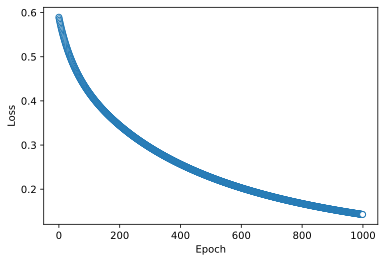

In [ ]:
#create everything
ANNclassify, lossfun, optimizer = createANNmodel(0.01)

#run it
losses, predictions, totalacc = trainTheModel(ANNclassify)

#report accuracy
print(f'Final accuracy: {totalacc}%')

#show the losses
plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=0.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Varying learning rates

In [ ]:
#learning rates
learningrates = np.linspace(0.001, 0.1, 50)

#initialize
accByLR = []
allLosses = np.zeros((len(learningrates), numepochs))

for i, lr in enumerate(learningrates):
  #create and run the model
  ANNclassify, lossfun, optimizer = createANNmodel(lr)
  losses, predictions, totalacc = trainTheModel(ANNclassify)

  #store the results
  accByLR.append(totalacc)
  allLosses[i, :] = losses.detach()

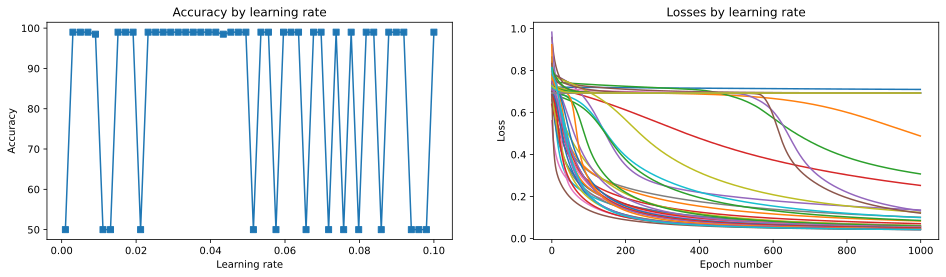

In [ ]:
#plot the results
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

ax[0].plot(learningrates, accByLR, 's-')
ax[0].set_xlabel('Learning rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by learning rate')

ax[1].plot(allLosses.T)
ax[1].set_title('Losses by learning rate')
ax[1].set_xlabel('Epoch number')
ax[1].set_ylabel('Loss')
plt.show()

In [ ]:
sum(torch.tensor(accByLR)>70)/len(accByLR)

tensor(0.7200)



---



In [ ]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

Import and process the data

In [ ]:
#import dataset
import seaborn as sns
iris = sns.load_dataset('iris')

#check out of the first few lines of data
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


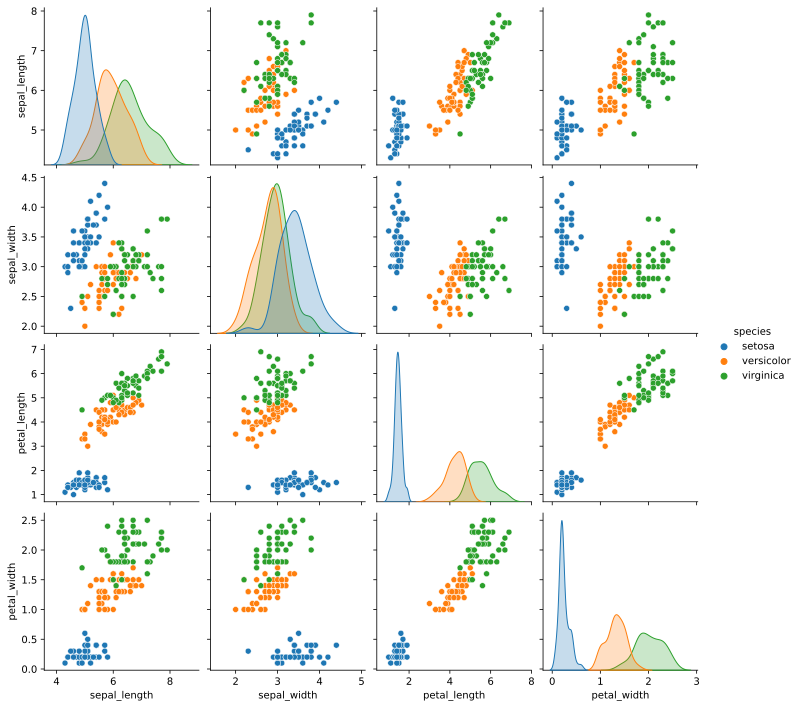

In [ ]:
#some plots to show the data
sns.pairplot(iris, hue='species')
plt.show()

In [ ]:
#organize the data

#convert from pandas dataframe to tensor
data = torch.tensor(iris[iris.columns[0:4]].values).float()

#transform species to number
labels = torch.zeros(len(data), dtype=torch.long)
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

Create the ANN model

In [ ]:
#model architecture
ANNiris = nn.Sequential(
    nn.Linear(4, 64),   #input layer
    nn.ReLU(),          #activation
    nn.Linear(64, 64),  #hidden layer
    nn.ReLU(),          #activation
    nn.Linear(64, 3)
)

#loss function
lossfun = nn.CrossEntropyLoss()

#optimizer
optimizer = torch.optim.SGD(ANNiris.parameters(), lr=0.01)

Train the model

In [ ]:
numepochs = 1000

#intialize losses
losses = torch.zeros(numepochs)
ongoingAcc = []

for epochi in range(numepochs):
  #forward pass
  yHat = ANNiris(data)

  #compute loss
  loss = lossfun(yHat, labels)
  losses[epochi] = loss

  #backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #compute accuracy
  matches = torch.argmax(yHat, axis=1) == labels
  matchesNumeric = matches.float()
  accuracyPct = 100*torch.mean(matchesNumeric)
  ongoingAcc.append(accuracyPct)

#final forward pass
predictions = ANNiris(data)

predlabels = torch.argmax(predictions, axis=1)
totalacc = 100*torch.mean((predlabels == labels).float())

Visualize the results

Final accuracy: 98.0%


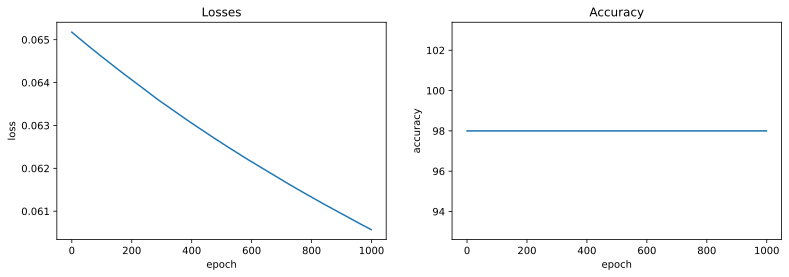

In [ ]:
#report accuracy
print(f'Final accuracy: {totalacc}%')

fig, ax = plt.subplots(1, 2, figsize=(13, 4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(ongoingAcc)
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_title('Accuracy')
plt.show()

In [ ]:
#confirm that all model predictions sum to 1, but only when converted to softmax
sm = nn.Softmax(1)
torch.sum(yHat, axis=1)

tensor([-0.6276, -0.5252, -0.5770, -0.5339, -0.6441, -0.6677, -0.5958, -0.5989,
        -0.5054, -0.5353, -0.6593, -0.5833, -0.5263, -0.5576, -0.7376, -0.7733,
        -0.6957, -0.6211, -0.6546, -0.6670, -0.5709, -0.6427, -0.6658, -0.5018,
        -0.4901, -0.5008, -0.5603, -0.6189, -0.6055, -0.5325, -0.5126, -0.5837,
        -0.7333, -0.7556, -0.5338, -0.5822, -0.6311, -0.6496, -0.5385, -0.5974,
        -0.6269, -0.3859, -0.5740, -0.5503, -0.5652, -0.5213, -0.6650, -0.5694,
        -0.6579, -0.5869,  0.2104,  0.2206,  0.2793,  0.2845,  0.2864,  0.2988,
         0.2670,  0.1280,  0.2521,  0.2381,  0.2309,  0.2180,  0.2413,  0.3080,
         0.0924,  0.1760,  0.3061,  0.2033,  0.3786,  0.2109,  0.3453,  0.1641,
         0.3956,  0.3033,  0.1985,  0.1993,  0.2982,  0.3419,  0.2861,  0.0800,
         0.2094,  0.1765,  0.1719,  0.4377,  0.3227,  0.2370,  0.2521,  0.3163,
         0.2074,  0.2576,  0.3098,  0.2773,  0.2117,  0.1343,  0.2630,  0.2120,
         0.2324,  0.2156,  0.0275,  0.22

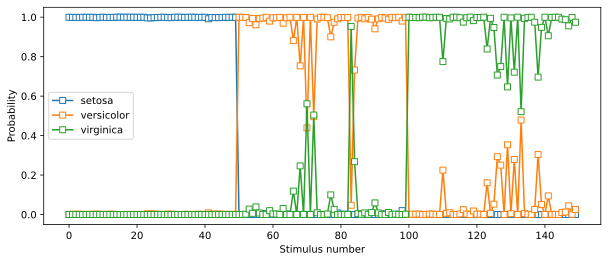

In [ ]:
#plot the raw model outputs
fig = plt.figure(figsize=(10, 4))

plt.plot(sm(yHat.detach()), 's-', markerfacecolor='w')
plt.xlabel('Stimulus number')
plt.ylabel('Probability')
plt.legend(['setosa', 'versicolor', 'virginica'])
plt.show()



---



In [ ]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

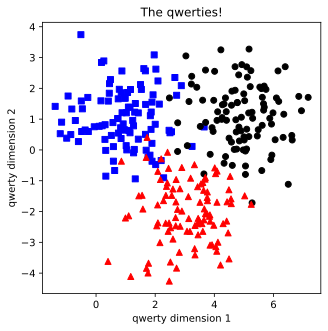

In [ ]:
# create data

nPerClust = 100
blur = 1

A = [1, 1]
B = [5, 1]
C = [3, -2]

# generate data
a = [A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur]
b = [B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur]
c = [C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1)),1+np.ones((nPerClust,1))))

# concatanate into a matrix
data_np = np.hstack((a,b,c)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.squeeze(torch.tensor(labels_np).long())

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.plot(data[np.where(labels==2)[0],0],data[np.where(labels==2)[0],1],'r^')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

Create the ANN model

In [ ]:
#model architecture
ANNq = nn.Sequential(
    nn.Linear(2, 4),   #input layer
    nn.ReLU(),         #activation unit
    nn.Linear(4, 3),   #output units
    nn.Softmax(dim=1)  #final activation unit
)

#loss function
lossfun = nn.CrossEntropyLoss()

#optimizer
optimizer = torch.optim.SGD(ANNq.parameters(), lr=0.01)

In [ ]:
#test the model
yHat = ANNq(data)

print(data.shape)
print(yHat.shape)

torch.Size([300, 2])
torch.Size([300, 3])


Train the model

In [ ]:
numepochs = 10000

#initialize losses
losses = torch.zeros(numepochs)
ongoingAcc = []

#loop over epochs
for epochi in range(numepochs):
  #forward pass
  yHat = ANNq(data)
  
  #compute loss
  loss = lossfun(yHat, labels)
  losses[epochi] = loss

  #backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #compute accuracy
  matches = torch.argmax(yHat, axis=1) == labels
  matchesNumeric = matches.float()
  accuracyPct = 100*torch.mean(matchesNumeric)
  ongoingAcc.append(accuracyPct)

#final forward pass
predictions = ANNq(data)

predlabels = torch.argmax(predictions, axis=1)
totalacc = 100*torch.mean((predlabels == labels).float())

Visualize the results

Final accuracy: 95.0%


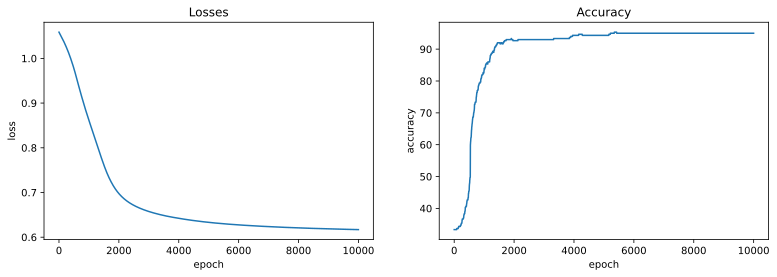

In [ ]:
#report accuracy
print(f'Final accuracy: {totalacc}%')

fig, ax = plt.subplots(1, 2, figsize=(13, 4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(ongoingAcc)
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_title('Accuracy')
plt.show()

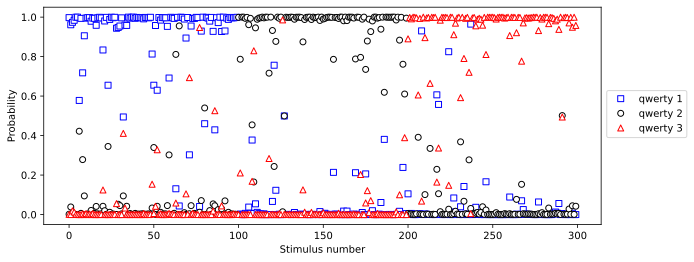

In [ ]:
#plot the raw model outputs
fig = plt.figure(figsize=(10, 4))

colorshape = ['bs', 'ko', 'r^']
for i in range(3):
  plt.plot(yHat[:, i].detach(), colorshape[i], markerfacecolor='w')
plt.xlabel('Stimulus number')
plt.ylabel('Probability')
plt.legend(['qwerty 1', 'qwerty 2', 'qwerty 3'], loc=(1.01, 0.4))
plt.show()



---



In [ ]:
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt

Import and organize the data

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


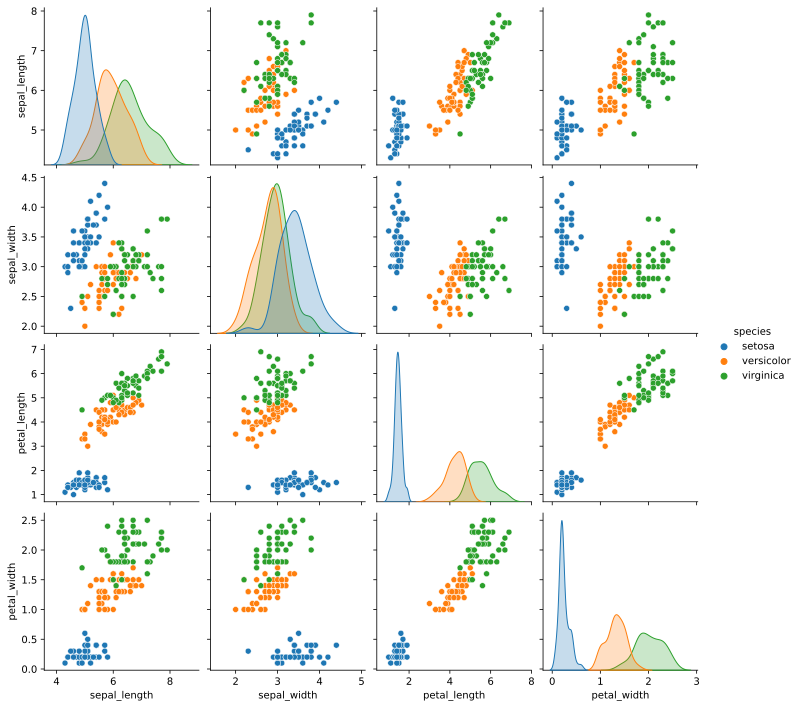

In [ ]:
#import dataset
import seaborn as sns
iris = sns.load_dataset('iris')
print(iris.head())

#plot the data
sns.pairplot(iris, hue='species')
plt.show()

In [ ]:
#organize the data

#convert from pandas dataframe to tensor
data = torch.tensor(iris[iris.columns[0:4]].values).float()

#transform species to number
labels = torch.zeros(len(data), dtype=torch.long)
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

Functions to create and train the model

In [ ]:
def createIrisModel(nHidden):
  #model architecture
  ANNiris = nn.Sequential(
      nn.Linear(4, nHidden),       #input layer
      nn.ReLU(),                   #activation unit
      nn.Linear(nHidden, nHidden), #hidden layer
      nn.ReLU(),                   #activation unit
      nn.Linear(nHidden, 3),       #output unit
  )

  #loss function
  lossfun = nn.CrossEntropyLoss()

  #optimizer
  optimizer = torch.optim.SGD(ANNiris.parameters(), lr=0.01)

  return ANNiris, lossfun, optimizer  

In [ ]:
#function to train the model
def trainTheModel(ANNiris):
  #initialize losses
  losses = torch.zeros(numepochs)
  ongoingAcc = []

  #loop over epochs
  for epochi in range(numepochs):
    #forward pass
    yHat = ANNiris(data)

    #compute loss
    loss = lossfun(yHat, labels)
    losses[epochi] = loss

    #backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  #final forward pass
  predictions = ANNiris(data)

  predlabels = torch.argmax(predictions, axis=1)
  return 100*torch.mean((predlabels == labels).float())

Run the experiment

In [ ]:
numepochs = 150
numhiddens = np.arange(1, 129)
accuracies = []

for nunits in numhiddens:
  #create a fresh model instance
  ANNiris, lossfun, optimizer = createIrisModel(nunits)

  #run the model
  acc = trainTheModel(ANNiris)
  accuracies.append(acc)

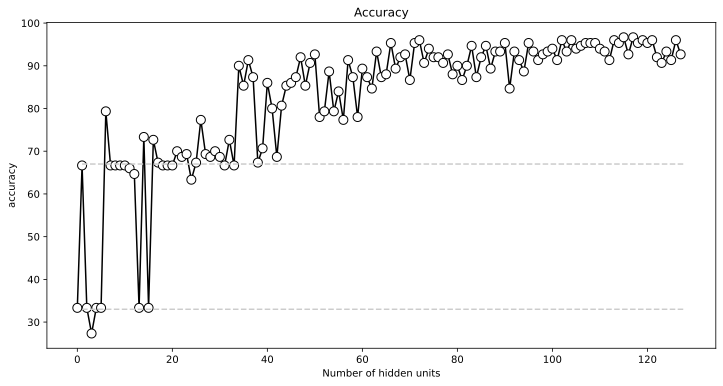

In [ ]:
#report accuracy
fig, ax = plt.subplots(1, figsize=(12, 6))

ax.plot(accuracies, 'ko-', markerfacecolor='w', markersize=9)
ax.plot(numhiddens[[0, -1]], [33, 33], '--', color=[0.8, 0.8, 0.8])
ax.plot(numhiddens[[0, -1]], [67, 67], '--', color=[0.8, 0.8, 0.8])
ax.set_ylabel('accuracy')
ax.set_xlabel('Number of hidden units')
ax.set_title('Accuracy')
plt.show()



---



In [ ]:
import numpy as np
import torch
import torch.nn as nn

In [ ]:
#build two models
widenet = nn.Sequential(
    nn.Linear(2, 4),    #hidden layer
    nn.Linear(4, 3)
)

deepnet = nn.Sequential(
    nn.Linear(2, 2),   #hidden layer
    nn.Linear(2, 2),   #hidden layer
    nn.Linear(2, 3)    #output layer
)

print(widenet)
print(deepnet)

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): Linear(in_features=4, out_features=3, bias=True)
)
Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): Linear(in_features=2, out_features=2, bias=True)
  (2): Linear(in_features=2, out_features=3, bias=True)
)


Peeking inside the network

In [ ]:
#check out the parameters
for p in deepnet.named_parameters():
  print(p)

('0.weight', Parameter containing:
tensor([[-0.2753,  0.4252],
        [-0.1711,  0.6715]], requires_grad=True))
('0.bias', Parameter containing:
tensor([0.3907, 0.3003], requires_grad=True))
('1.weight', Parameter containing:
tensor([[-0.2723, -0.6649],
        [-0.2458,  0.0131]], requires_grad=True))
('1.bias', Parameter containing:
tensor([-0.4275,  0.5266], requires_grad=True))
('2.weight', Parameter containing:
tensor([[ 0.3323,  0.5493],
        [-0.2124,  0.3951],
        [-0.2866, -0.1474]], requires_grad=True))
('2.bias', Parameter containing:
tensor([0.3570, 0.6162, 0.6396], requires_grad=True))


In [ ]:
for p in widenet.parameters():
  print(p)

Parameter containing:
tensor([[ 0.5964,  0.5446],
        [-0.1785, -0.0523],
        [ 0.4282,  0.0358],
        [ 0.6319,  0.7039]], requires_grad=True)
Parameter containing:
tensor([0.6836, 0.1942, 0.2552, 0.0778], requires_grad=True)
Parameter containing:
tensor([[ 0.3550, -0.4579,  0.1597, -0.0729],
        [ 0.3472,  0.1550, -0.2854,  0.2170],
        [ 0.0247,  0.0354, -0.3673,  0.0164]], requires_grad=True)
Parameter containing:
tensor([-0.3226,  0.3565, -0.0114], requires_grad=True)


In [ ]:
#count the number of  nodes

numNodesInWide = 0
for p in widenet.named_parameters():
  if 'bias' in p[0]:
    numNodesInWide += len(p[1])

numNodesInDeep = 0
for paramName, paramVect in deepnet.named_parameters():
  if 'bias' in paramName:
    numNodesInDeep += len(paramVect)

print(f'There are {numNodesInWide} nodes in the wide network')
print(f'There are {numNodesInWide} nodes in the deep network')

There are 7 nodes in the wide network
There are 7 nodes in the deep network


In [ ]:
#count the total number of trainable parameters
nparams = 0
for p in widenet.parameters():
  if p.requires_grad:
    print(f'This piece has {p.numel()}')
    nparams += p.numel()

print(f'Total of {nparams} parameters')

This piece has 8
This piece has 4
This piece has 12
This piece has 3
Total of 27 parameters


In [ ]:
#using list comprehension

nparams = np.sum([p.numel() for p in widenet.parameters() if p.requires_grad])
print(f'Widenet has {nparams} parameters')

nparams = np.sum([p.numel() for p in deepnet.parameters() if p.requires_grad])
print(f'Deepnet has {nparams} parameters')

Widenet has 27 parameters
Deepnet has 21 parameters


In [ ]:
#print model info
from torchsummary import summary
summary(widenet, (1, 2))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 4]              12
            Linear-2                 [-1, 1, 3]              15
Total params: 27
Trainable params: 27
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------




---



In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

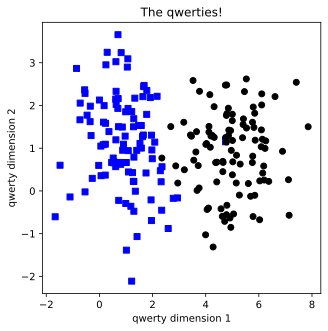

In [ ]:
#create data

nPerClust = 100
blur = 1

A = [1, 1]
B = [5, 1]

#generate data
a = [A[0]+np.random.randn(nPerClust)*blur, A[1]+np.random.randn(nPerClust)*blur]
b = [B[0]+np.random.randn(nPerClust)*blur, B[1]+np.random.randn(nPerClust)*blur]

#true labels
labels_np = np.vstack((np.zeros((nPerClust, 1)), np.ones((nPerClust, 1))))

#concatenate into a matrix
data_np = np.hstack((a, b)).T

#convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

#show the data
fig = plt.figure(figsize=(5, 5))
plt.plot(data[np.where(labels==0)[0], 0], data[np.where(labels==0)[0], 1], 'bs')
plt.plot(data[np.where(labels==1)[0], 0], data[np.where(labels==1)[0], 1], 'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [ ]:
#define the class
class theClassForANN(nn.Module):
  def __init__(self):
    super().__init__()

    #input layer
    self.input = nn.Linear(2, 1)

    #output layer
    self.output = nn.Linear(1, 1)

  #forward pass
  def forward(self, x):
    #pass through the input layer
    x = self.input(x)

    #apply relu
    x = F.relu(x)

    #output layer
    x = self.output(x)
    x = torch.sigmoid(x)

    return x

ANNclassify = theClassForANN()

In [ ]:
#other model features

learningRate = 0.01

#loss function
lossfun = nn.BCELoss()

#optimizer
optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=learningRate)

In [ ]:
#train the model
numepochs = 1000
losses = torch.zeros(numepochs)

for epochi in range(numepochs):
  #forward pass
  yHat = ANNclassify(data)
  
  #compute loss
  loss = lossfun(yHat, labels)
  losses[epochi] = loss

  #backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

In [ ]:
#compute the predictions
#manually compute losses
#final forward pass
predictions = ANNclassify(data)

predlabels = predictions > 0.5

#find errors
misclassified = np.where(predlabels != labels)[0]

#total accuracy
totalacc = 100-100*len(misclassified)/(2*nPerClust)

print(f'Final accuracy: {totalacc}')

Final accuracy: 84.5


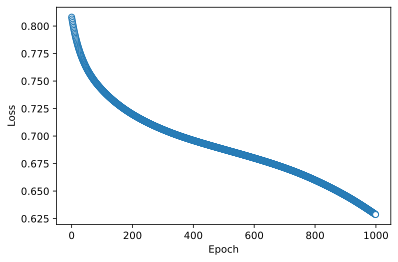

In [ ]:
#show the losses
plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=0.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

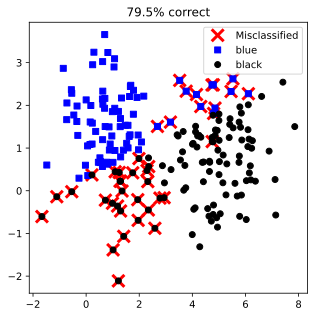

In [ ]:
# plot the labeled data
fig = plt.figure(figsize=(5,5))
plt.plot(data[misclassified,0] ,data[misclassified,1],'rx',markersize=12,markeredgewidth=3)
plt.plot(data[np.where(~predlabels)[0],0],data[np.where(~predlabels)[0],1],'bs')
plt.plot(data[np.where(predlabels)[0],0] ,data[np.where(predlabels)[0],1] ,'ko')

plt.legend(['Misclassified','blue','black'],bbox_to_anchor=(1,1))
plt.title(f'{totalacc}% correct')
plt.show()



---



In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

Import and organize the data

In [ ]:
#import dataset
import seaborn as sns
iris = sns.load_dataset('iris')

#convert from pandas dataframe to tensor
data = torch.tensor(iris[iris.columns[0:4]].values).float()

#transform species to number
labels = torch.zeros(len(data), dtype=torch.long)
labels[iris.species == 'versicolor'] = 1
labels[iris.species == 'verginica'] = 2

Construct and sanity-check the model

In [ ]:
#create a class for the model
class ANNiris(nn.Module):
  def __init__(self, nUnits, nLayers):
    super().__init__()

    #create dictionary to store the layers
    self.layers = nn.ModuleDict()
    self.nLayers = nLayers

    #input layer
    self.layers['input'] = nn.Linear(4, nUnits)

    #hidden layer
    for i in range(nLayers):
      self.layers[f'hidden{i}'] = nn.Linear(nUnits, nUnits)

    #output layer
    self.layers['output'] = nn.Linear(nUnits, 3)

  #forward pass
  def forward(self, x):
    #input layer
    x = self.layers['input'](x)

    #hidden layers
    for i in range(self.nLayers):
      x = F.relu(self.layers[f'hidden{i}'](x))

    #output layer
    x = self.layers['output'](x)

    return x

In [ ]:
#generate an instance of the model and inspect it
nUnitsPerLayer = 12
nLayers = 4
net = ANNiris(nUnitsPerLayer, nLayers)
net

ANNiris(
  (layers): ModuleDict(
    (input): Linear(in_features=4, out_features=12, bias=True)
    (hidden0): Linear(in_features=12, out_features=12, bias=True)
    (hidden1): Linear(in_features=12, out_features=12, bias=True)
    (hidden2): Linear(in_features=12, out_features=12, bias=True)
    (hidden3): Linear(in_features=12, out_features=12, bias=True)
    (output): Linear(in_features=12, out_features=3, bias=True)
  )
)

In [ ]:
#a quick test of running some numbers through the model
#this simply ensures that the architecture is internally consistent

#10 samples, 4 dimensions
tmpx = torch.randn(10, 4)

y = net(tmpx)

print(y.shape)
print(y)

torch.Size([10, 3])
tensor([[-0.1523,  0.0347,  0.0688],
        [-0.1529,  0.0299,  0.0594],
        [-0.1531,  0.0309,  0.0594],
        [-0.1575,  0.0383,  0.0703],
        [-0.1630,  0.0377,  0.0549],
        [-0.1501,  0.0282,  0.0614],
        [-0.1565,  0.0350,  0.0618],
        [-0.1613,  0.0416,  0.0650],
        [-0.1619,  0.0401,  0.0648],
        [-0.1554,  0.0380,  0.0720]], grad_fn=<AddmmBackward0>)


Create a function that trains the model

In [ ]:
#a function to train the model
def trainTheModel(theModel):
  #define the loss function and optimizer
  lossfun = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(theModel.parameters(), lr=0.01)

  #loop over epochs
  for epochi in range(numepochs):
    #forward pass
    yHat = theModel(data)

    #compute loss
    loss = lossfun(yHat, labels)

    #backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  #final forward pass to get accuracy
  predictions = theModel(data)
  predlabels = torch.argmax(predictions, axis=1)
  acc = 100*torch.mean((predlabels == labels).float())

  #total number of trainable parameters in the model
  nParams = sum(p.numel() for p in theModel.parameters() if p.requires_grad)

  return acc, nParams

In [ ]:
#test the function once
numepochs = 2500
acc = trainTheModel(net)

#check the outputs
acc

(tensor(92.6667), 723)

Now for the experiment

In [ ]:
#define the model parameters
numlayers = range(1, 6)    #number of hidden layers
numunits = np.arange(4, 101, 3) #units per hidden layer

#initialize output matrices
accuracies = np.zeros((len(numunits), len(numlayers)))
totalparams = np.zeros((len(numunits), len(numlayers)))

#number of training epochs
numepochs = 500

#start the experiment
for unitidx in range(len(numunits)):
  for layeridx in range(len(numlayers)):
  #create a fresh model instance
    net = ANNiris(numunits[unitidx], numlayers[layeridx])

    #run the model and store the results
    acc, nParams = trainTheModel(net)
    accuracies[unitidx, layeridx] = acc

    #store the total number of paramters in the model
    totalparams[unitidx, layeridx] = nParams

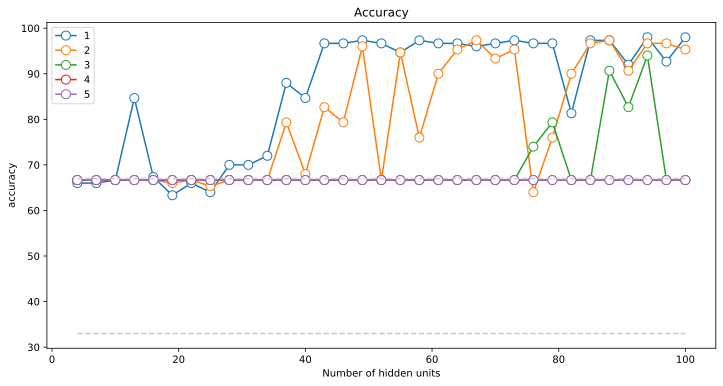

In [ ]:
#show accuracy as a function of model depth
fig, ax = plt.subplots(1, figsize=(12, 6))

ax.plot(numunits, accuracies, 'o-', markerfacecolor='w', markersize=9)
ax.plot(numunits[[0, -1]], [33, 33], '--', color=[0.8, 0.8, 0.8])
ax.plot(numunits[[0, -1]], [67, 67], '--', color=[0.8, 0.8, 0.8])
ax.legend(numlayers)
ax.set_ylabel('accuracy')
ax.set_xlabel('Number of hidden units')
ax.set_title('Accuracy')
plt.show()

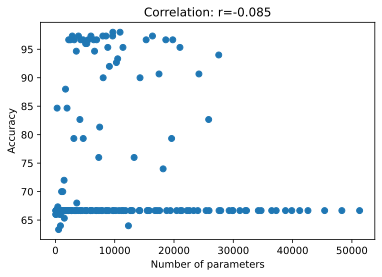

In [ ]:
 #maybe it's simply a matter of more parameters

#vectorize for convenience
x = totalparams.flatten()
y = accuracies.flatten()

#correlation between them
r = np.corrcoef(x, y)[0, 1]

#scatter plot
plt.plot(x, y, 'o')
plt.xlabel('Number of parameters')
plt.ylabel('Accuracy')
plt.title('Correlation: r=' + str(np.round(r, 3)))
plt.show()



---



Chapter 8: Overfitting

In [ ]:
import torch
import torch.nn as nn
import numpy as np

In [ ]:
#import dataset
import seaborn as sns
iris = sns.load_dataset('iris')

data = torch.tensor(iris[iris.columns[0:4]].values).float()

labels = torch.zeros(len(data), dtype=torch.long)
labels[iris.species == 'versicolor'] = 1
labels[iris.species == 'virginica'] = 2

Seperate data into train and test

In [ ]:
propTraining = 0.8
nTraining = int(len(labels)*propTraining)

traintestBool = np.zeros(len(labels), dtype=bool)

itemsToUseForTrain = np.random.choice(range(len(labels)), nTraining, replace = True)
traintestBool[itemsToUseForTrain] = True

traintestBool

array([False,  True,  True, False, False,  True, False,  True,  True,
        True,  True, False,  True,  True, False, False, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False, False,  True, False,  True,  True, False,
        True, False,  True,  True,  True, False, False,  True, False,
        True, False,  True, False,  True, False,  True,  True,  True,
        True,  True, False, False,  True,  True, False, False, False,
        True, False,  True, False, False, False,  True, False, False,
        True,  True, False, False, False,  True, False, False, False,
        True,  True, False,  True,  True,  True, False,  True,  True,
       False,  True,  True, False,  True,  True, False,  True,  True,
        True, False,  True, False,  True, False, False,  True, False,
       False, False,  True, False,  True, False,  True,  True, False,
       False,  True, False,  True, False,  True, False,  True, False,
       False, False,

In [ ]:
print("Average of full data:")
print(torch.mean(labels.float()))

print("Average of training data:")
print(torch.mean(labels[traintestBool].float()))

print("Average of test data")
print(torch.mean(labels[~traintestBool].float()))

Average of full data:
tensor(1.)
Average of training data:
tensor(0.9259)
Average of test data
tensor(1.0870)


In [ ]:
#create the ANN model

ANNiris = nn.Sequential(
    nn.Linear(4, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 3)
)

lossfun = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(ANNiris.parameters(), lr=0.01)

In [ ]:
#entire dataset
print(data.shape)

#training set
print(data[traintestBool, :].shape)

#test set
print(data[~traintestBool, :].shape)

torch.Size([150, 4])
torch.Size([81, 4])
torch.Size([69, 4])


Train and test the model

In [ ]:
#train the model
numepochs = 1000

#initialize losses
losses = torch.zeros(numepochs)
ongoingAcc = []

for epochi in range(numepochs):
  yHat = ANNiris(data[traintestBool, :])

  ongoingAcc.append(100*torch.mean((torch.argmax(yHat, axis=1) == labels[traintestBool]).float()))

  loss = lossfun(yHat, labels[traintestBool])
  losses[epochi] = loss
  
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


In [ ]:
#compute train and test accuracies

#final round pass using training data
predictions = ANNiris(data[traintestBool, :])
trainacc = 100*torch.mean((torch.argmax(predictions, axis=1) == labels[traintestBool]).float())

#final forward pass using test data
predictions = ANNiris(data[~traintestBool, :])
testacc = 100*torch.mean((torch.argmax(predictions, axis=1) == labels[~traintestBool]).float())

In [ ]:
#report accuracies
print(f"Final train accuracy: {trainacc}%")
print(f"Final test accuracy: {testacc}%")

Final train accuracy: 98.76543426513672%
Final test accuracy: 97.10144805908203%




---



In [1]:
import torch 
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [4]:
#import dataset
import seaborn as sns
iris = sns.load_dataset('iris')

data = torch.tensor(iris[iris.columns[0:4]].values).float()

labels = torch.zeros(len(data), dtype=torch.long)
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

A brief aside on using train_test_split

In [6]:
#create fake dataset
fakedata = np.tile(np.array([1, 2, 3, 4]), (10, 1)) + np.tile(10*np.arange(1, 11), (4, 1)).T
fakelabels = np.arange(10) > 4
print(fakedata)
print(fakelabels)

[[ 11  12  13  14]
 [ 21  22  23  24]
 [ 31  32  33  34]
 [ 41  42  43  44]
 [ 51  52  53  54]
 [ 61  62  63  64]
 [ 71  72  73  74]
 [ 81  82  83  84]
 [ 91  92  93  94]
 [101 102 103 104]]
[False False False False False  True  True  True  True  True]


In [28]:
train_data, test_data, train_labels, test_labels = train_test_split(fakedata, fakelabels, test_size=0.2)

print(f'Training data size: {train_data.shape}')
print(f'Test data size: {test_data.shape}')

print('Training data:')
print(train_data)

print('Test data:')
print(test_data)

Training data size: (8, 4)
Test data size: (2, 4)
Training data:
[[ 41  42  43  44]
 [ 61  62  63  64]
 [ 11  12  13  14]
 [ 51  52  53  54]
 [ 91  92  93  94]
 [ 81  82  83  84]
 [ 31  32  33  34]
 [101 102 103 104]]
Test data:
[[71 72 73 74]
 [21 22 23 24]]


Now back to the model

In [29]:
def createANewModel():
  ANNiris = nn.Sequential(
      nn.Linear(4, 64),
      nn.ReLU(),
      nn.Linear(64, 64),
      nn.ReLU(),
      nn.Linear(64, 3)
  )

  lossfun = nn.CrossEntropyLoss()

  optimizer = torch.optim.SGD(ANNiris.parameters(), lr=0.01)

  return ANNiris, lossfun, optimizer

In [41]:
#train the model

numepochs = 200

def trainTheModel(trainProp):

  losses = torch.zeros(numepochs)
  trainAcc = []
  testAcc = []
  X_train, X_test, y_train, y_test = train_test_split(data, labels, train_size=trainProp) 

  for epochi in range(numepochs):


    yHat = ANNiris(X_train)
    loss = lossfun(yHat, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #train accuracy
    trainAcc.append(100*torch.mean((torch.argmax(yHat, axis=1) == y_train).float()).item())

    #test accuracy
    predlabels = torch.argmax(ANNiris(X_test), axis=1)
    testAcc.append(100*torch.mean((predlabels == y_test).float()).item())

  return trainAcc, testAcc

Test the model by running it once

In [44]:
ANNiris, lossfun, optimizer = createANewModel()

trainAcc, testAcc = trainTheModel(0.8)

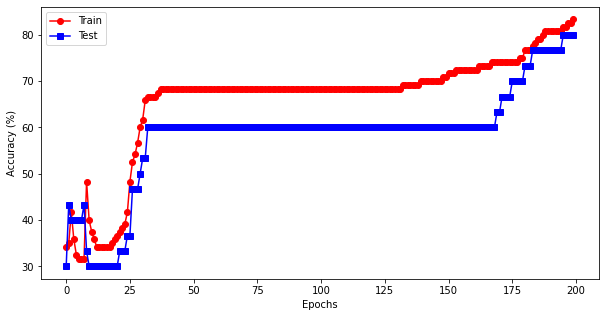

In [45]:
#plot the results
fig = plt.figure(figsize=(10, 5))

plt.plot(trainAcc, 'ro-')
plt.plot(testAcc, 'bs-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend(['Train', 'Test'])
plt.show()

Now for the experiment

In [49]:
trainSetSizes = np.linspace(0.2, 0.95, 10)

allTrainAcc = np.zeros((len(trainSetSizes), numepochs))
allTestAcc = np.zeros((len(trainSetSizes), numepochs))

for i in range(len(trainSetSizes)):
  ANNirsi, lossfun, optimizer = createANewModel()

  trainAcc, testAcc = trainTheModel(trainSetSizes[i])

  allTrainAcc[i, :] = trainAcc
  allTestAcc[i, :] = testAcc

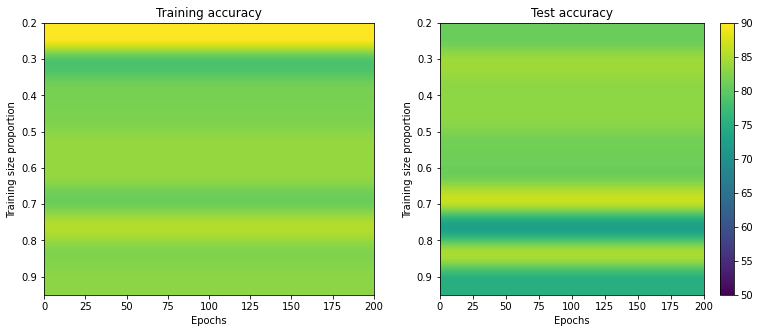

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(13, 5))

ax[0].imshow(allTrainAcc, aspect='auto', vmin=50, vmax=90, extent=[0, numepochs, trainSetSizes[-1], trainSetSizes[0]])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Training size proportion')
ax[0].set_title('Training accuracy')

p = ax[1].imshow(allTestAcc, aspect='auto', vmin=50, vmax=90, extent=[0, numepochs, trainSetSizes[-1], trainSetSizes[0]])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training size proportion')
ax[1].set_title('Test accuracy')
fig.colorbar(p, ax=ax[1])

plt.show()



---



In [68]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from torch.utils.data import DataLoader, TensorDataset

In [52]:
#import dataset
import seaborn as sns
iris = sns.load_dataset('iris')

data = torch.tensor(iris[iris.columns[0:4]].values).float()

labels = torch.zeros(len(data), dtype=torch.long)
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

A brief aside on using DataLoader

In [53]:
#create fake dataset
fakedata = np.tile(np.array([1, 2, 3, 4]), (10, 1)) + np.tile(10*np.arange(1, 11), (4, 1)).T
fakelabels = np.arange(10) > 4
print(fakedata)
print(fakelabels)

[[ 11  12  13  14]
 [ 21  22  23  24]
 [ 31  32  33  34]
 [ 41  42  43  44]
 [ 51  52  53  54]
 [ 61  62  63  64]
 [ 71  72  73  74]
 [ 81  82  83  84]
 [ 91  92  93  94]
 [101 102 103 104]]
[False False False False False  True  True  True  True  True]


In [54]:
fakedataLdr = DataLoader(fakedata, shuffle=True)
print(fakedataLdr)
print(fakedataLdr.batch_size)

1


In [55]:
#iterate through the data
for i, oneSample in enumerate(fakedataLdr):
  print(i, oneSample, oneSample.shape)

0 tensor([[31, 32, 33, 34]]) torch.Size([1, 4])
1 tensor([[81, 82, 83, 84]]) torch.Size([1, 4])
2 tensor([[11, 12, 13, 14]]) torch.Size([1, 4])
3 tensor([[61, 62, 63, 64]]) torch.Size([1, 4])
4 tensor([[51, 52, 53, 54]]) torch.Size([1, 4])
5 tensor([[71, 72, 73, 74]]) torch.Size([1, 4])
6 tensor([[41, 42, 43, 44]]) torch.Size([1, 4])
7 tensor([[91, 92, 93, 94]]) torch.Size([1, 4])
8 tensor([[101, 102, 103, 104]]) torch.Size([1, 4])
9 tensor([[21, 22, 23, 24]]) torch.Size([1, 4])


In [73]:
#we need to create a dataset that contains the data and labels
fakeDataset = TensorDataset(torch.Tensor(fakedata), torch.Tensor(fakelabels))
print(fakeDataset.tensors)

#then create another DataLoader
fakedataLdr = DataLoader(fakeDataset, shuffle=True)

#iterate through the data
for dat, lab in fakedataLdr:
  print(dat, lab)

(tensor([[ 11.,  12.,  13.,  14.],
        [ 21.,  22.,  23.,  24.],
        [ 31.,  32.,  33.,  34.],
        [ 41.,  42.,  43.,  44.],
        [ 51.,  52.,  53.,  54.],
        [ 61.,  62.,  63.,  64.],
        [ 71.,  72.,  73.,  74.],
        [ 81.,  82.,  83.,  84.],
        [ 91.,  92.,  93.,  94.],
        [101., 102., 103., 104.]]), tensor([0., 0., 0., 0., 0., 1., 1., 1., 1., 1.]))
tensor([[71., 72., 73., 74.]]) tensor([1.])
tensor([[31., 32., 33., 34.]]) tensor([0.])
tensor([[81., 82., 83., 84.]]) tensor([1.])
tensor([[21., 22., 23., 24.]]) tensor([0.])
tensor([[91., 92., 93., 94.]]) tensor([1.])
tensor([[41., 42., 43., 44.]]) tensor([0.])
tensor([[101., 102., 103., 104.]]) tensor([1.])
tensor([[61., 62., 63., 64.]]) tensor([1.])
tensor([[51., 52., 53., 54.]]) tensor([0.])
tensor([[11., 12., 13., 14.]]) tensor([0.])


In [75]:
train_data, test_data, train_labels, test_labels = train_test_split(fakedata, fakelabels, test_size=0.2)

#convert them into Pytorch Dataset
train_data = TensorDataset(torch.Tensor(train_data), torch.Tensor(train_labels))

test_data = TensorDataset(torch.Tensor(test_data), torch.Tensor(test_labels))

train_loader = DataLoader(train_data, batch_size=4)
test_loader = DataLoader(test_data)

In [76]:
#examine the contents of the dataloader
print('TRAINING DATA')
for batch, label in train_loader:
  print(batch, label)

print('TESTING DATA')
for batch, label in test_loader:
  print(batch, label) 

TRAINING DATA
tensor([[31., 32., 33., 34.],
        [61., 62., 63., 64.],
        [51., 52., 53., 54.],
        [41., 42., 43., 44.]]) tensor([0., 1., 0., 0.])
tensor([[ 11.,  12.,  13.,  14.],
        [ 71.,  72.,  73.,  74.],
        [ 81.,  82.,  83.,  84.],
        [101., 102., 103., 104.]]) tensor([0., 1., 1., 1.])
TESTING DATA
tensor([[91., 92., 93., 94.]]) tensor([1.])
tensor([[21., 22., 23., 24.]]) tensor([0.])


Now back to the real data

In [81]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, train_size=0.8)

train_data = TensorDataset(train_data, train_labels)
test_data = TensorDataset(test_data, test_labels)

train_loader = DataLoader(train_data, shuffle=True, batch_size=12)
test_loader = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

In [82]:
#check the sizes of data batches
for X, y in train_loader:
  print(X.shape, y.shape)

X, y

torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])


(tensor([[4.3000, 3.0000, 1.1000, 0.1000],
         [6.7000, 3.3000, 5.7000, 2.1000],
         [6.5000, 3.2000, 5.1000, 2.0000],
         [6.4000, 3.2000, 5.3000, 2.3000],
         [5.3000, 3.7000, 1.5000, 0.2000],
         [5.7000, 2.9000, 4.2000, 1.3000],
         [6.2000, 3.4000, 5.4000, 2.3000],
         [4.7000, 3.2000, 1.6000, 0.2000],
         [6.2000, 2.8000, 4.8000, 1.8000],
         [5.5000, 2.4000, 3.8000, 1.1000],
         [6.6000, 3.0000, 4.4000, 1.4000],
         [5.8000, 2.7000, 5.1000, 1.9000]]),
 tensor([0, 2, 2, 2, 0, 1, 2, 0, 2, 1, 1, 2]))

In [83]:
#check sizes of test data batches
for X, y in test_loader:
  print(X.shape, y.shape)

torch.Size([30, 4]) torch.Size([30])


In [84]:
def createANewModel():
  ANNiris = nn.Sequential(
      nn.Linear(4, 64),
      nn.ReLU(),
      nn.Linear(64, 64),
      nn.ReLU(),
      nn.Linear(64, 3)
  )

  lossfun = nn.CrossEntropyLoss()

  optimizer = torch.optim.SGD(ANNiris.parameters(), lr=0.01)

  return ANNiris, lossfun, optimizer

In [86]:
#train the model

numepochs = 500

def trainTheModel():

  trainAcc = []
  testAcc = []

  for epochi in range(numepochs):

    batchAcc = []
    for X, y in train_loader:
      yHat = ANNiris(X)
      loss = lossfun(yHat, y)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      batchAcc.append(100*torch.mean((torch.argmax(yHat, axis=1) == y).float()).item())

    trainAcc.append(np.mean(batchAcc))
    
    #test accuracy
    X, y = next(iter(test_loader))
    predlabels = torch.argmax(ANNiris(X), axis=1)
    testAcc.append(100*torch.mean((predlabels == y).float()).item())

  return trainAcc, testAcc